In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import plotly.express as px 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler 
from sklearn.linear_model import LogisticRegression, Lasso, Ridge 
from sklearn.metrics import mean_squared_error, confusion_matrix , accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings("ignore")
import xgboost as xgb

# Data Collection and Exploration

## Load the data 

In [4]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Display basic information about the dataset

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Check for missing duplicat

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [11]:
df.drop_duplicates(inplace=True)

## Check for missing values

In [13]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Basic statistics of the dataset

In [15]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [16]:
# Convert the 'TotalCharges' column to numeric, and handle any errors during the conversion
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check if any missing values were introduced during conversion
missing_after_conversion = df['TotalCharges'].isnull().sum()

# Filling missing values in 'TotalCharges' with the median value as it's a continuous variable
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)

# Re-check for any missing values after filling
missing_values_after_cleaning = df.isnull().sum()

# Output results
missing_after_conversion, missing_values_after_cleaning.head()


(11,
 customerID       0
 gender           0
 SeniorCitizen    0
 Partner          0
 Dependents       0
 dtype: int64)

# Data Analysis and Visualization

## Exploratory Data Analysis (EDA)

In [19]:
df_1=(df.drop("customerID",axis=1)).select_dtypes(include=["object","bool"])

In [20]:
df_1.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

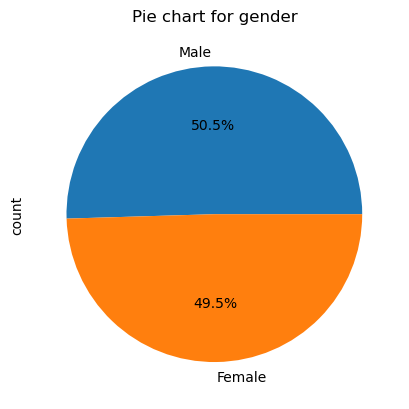

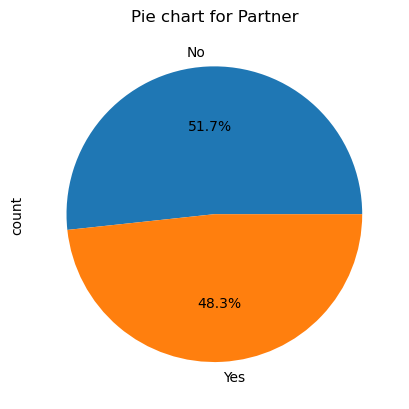

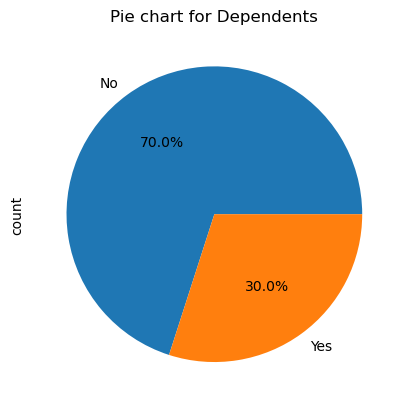

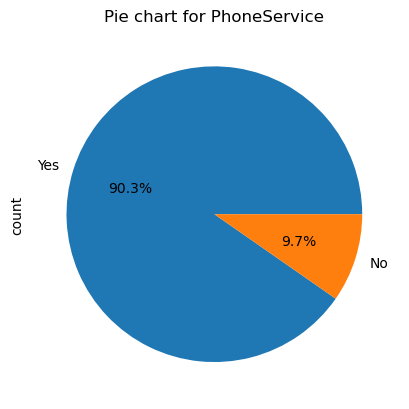

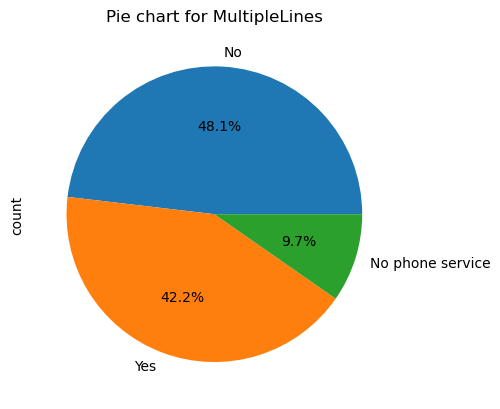

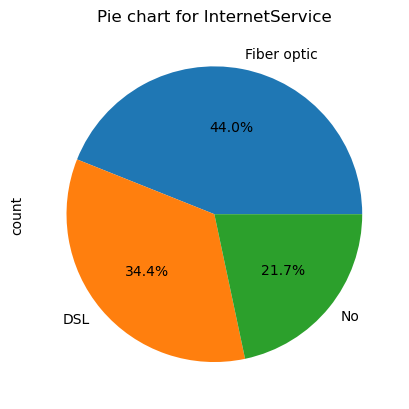

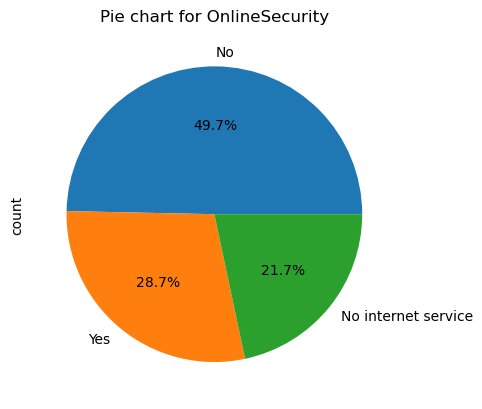

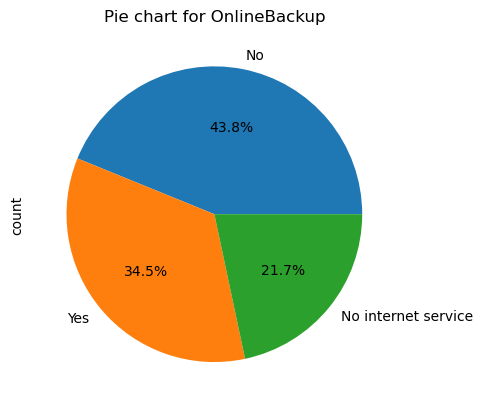

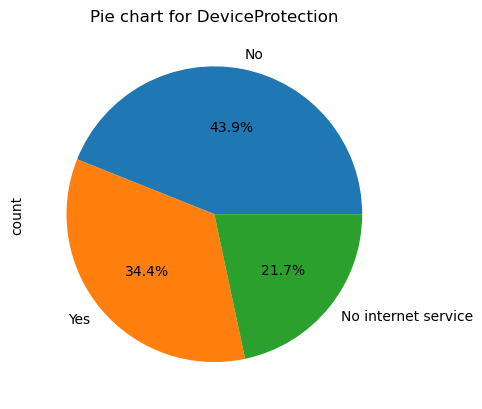

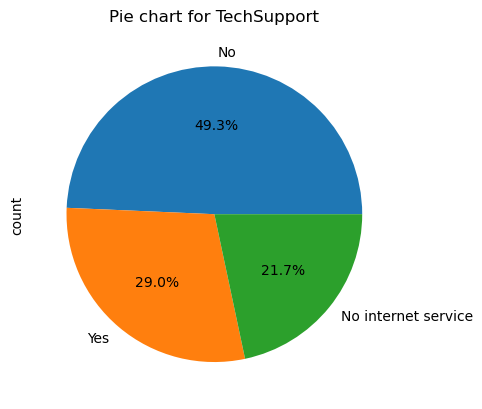

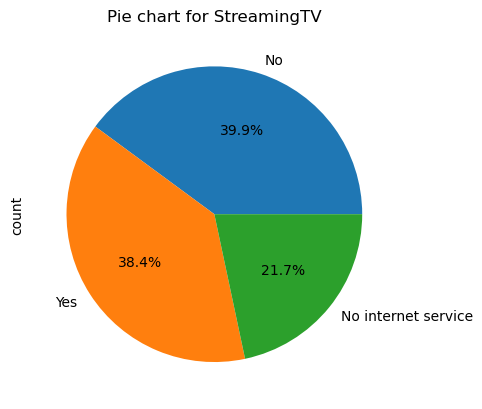

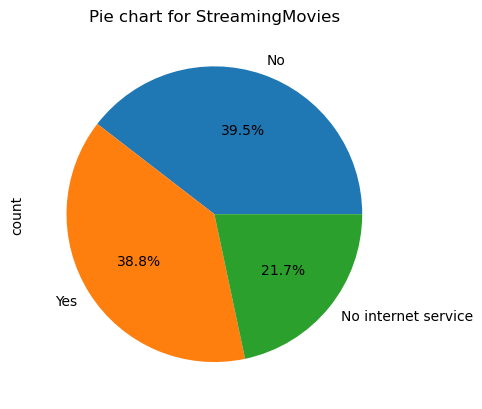

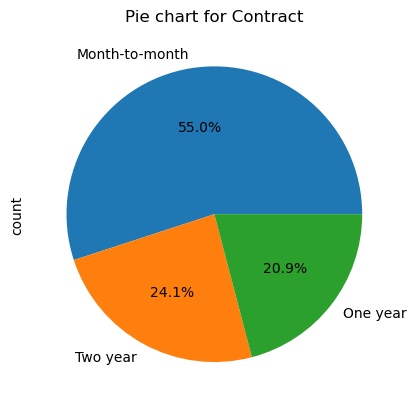

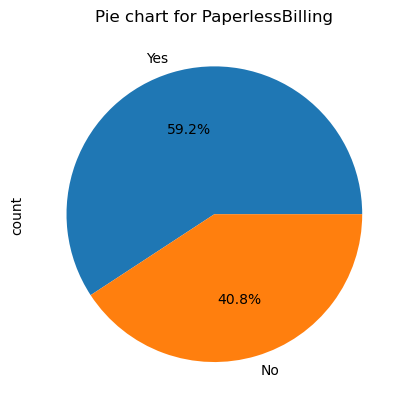

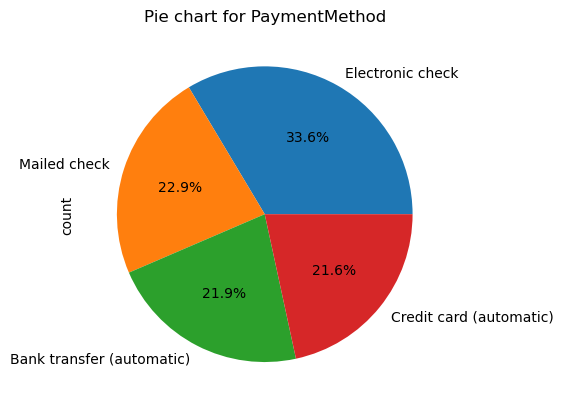

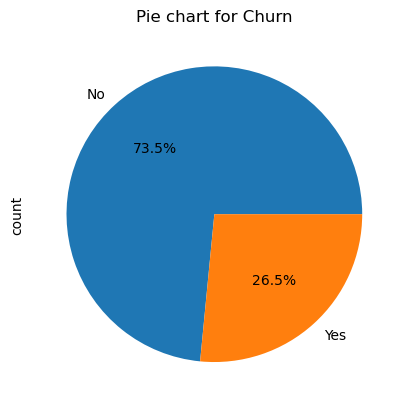

In [21]:
for col in df_1.columns:
    df_1[col].value_counts().plot(kind="pie",autopct='%1.1f%%',title=f'Pie chart for {col}')
    plt.show()

In [22]:
gb = df.groupby("Churn").agg({'Churn':"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


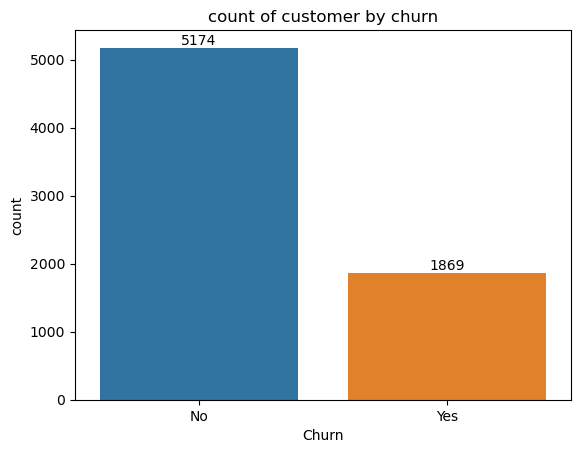

In [23]:
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("count of customer by churn")
plt.show()

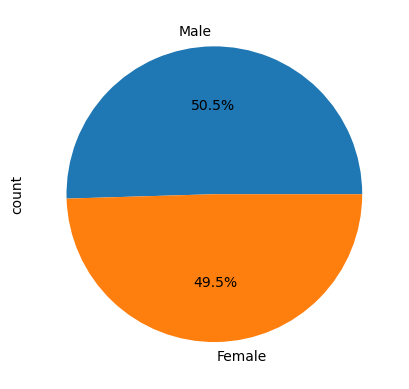

In [24]:
df['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%');

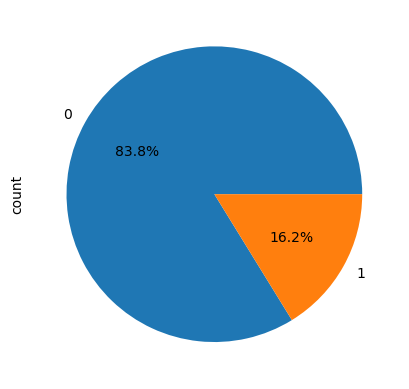

In [25]:
df['SeniorCitizen'].value_counts().plot(kind='pie',autopct='%1.1f%%');

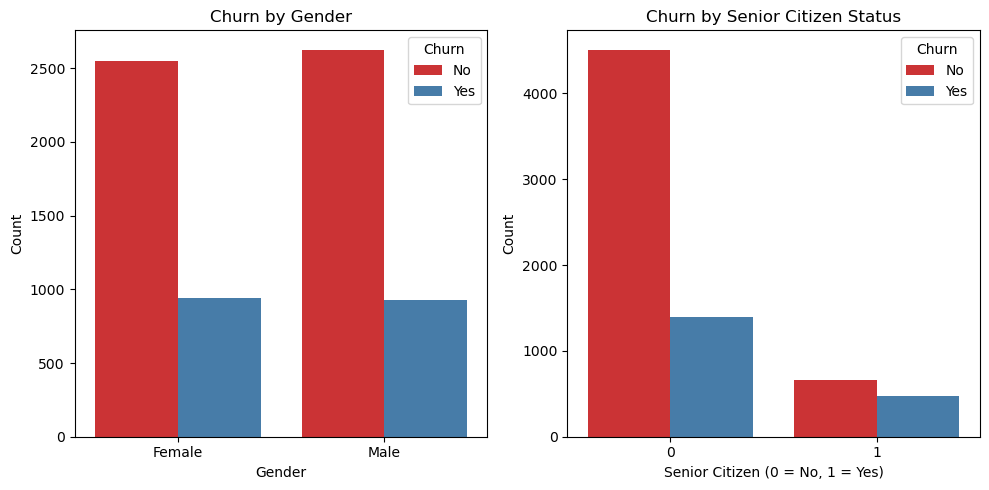

In [26]:
# 2. Demographic Insights (Gender and Senior Citizen)
plt.figure(figsize=(10, 5))

# Gender vs Churn
plt.subplot(1, 2, 1)
sns.countplot(x='gender', hue='Churn', data=df, palette='Set1')
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Senior Citizen vs Churn
plt.subplot(1, 2, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='Set1')
plt.title("Churn by Senior Citizen Status")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


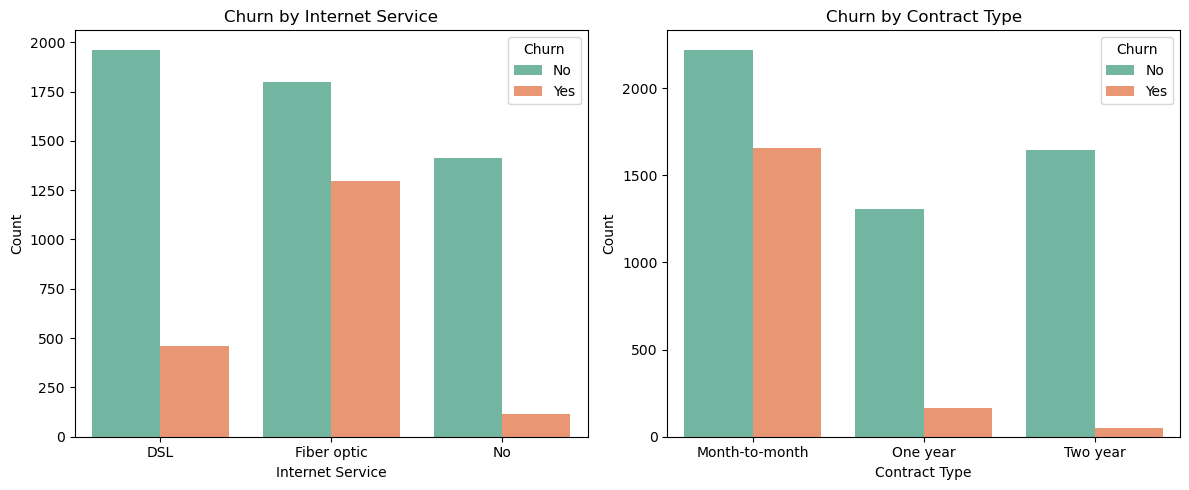

In [27]:
# 3. Service Usage Analysis (InternetService and Contract)
plt.figure(figsize=(12, 5))

# Internet Service vs Churn
plt.subplot(1, 2, 1)
sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set2')
plt.title("Churn by Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Count")

# Contract Type vs Churn
plt.subplot(1, 2, 2)
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

<Axes: >

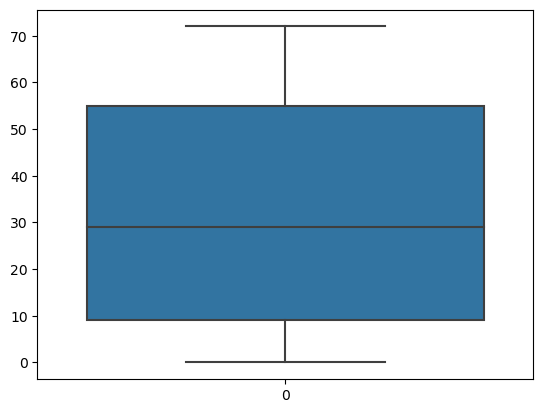

In [28]:
sns.boxplot(df['tenure'])

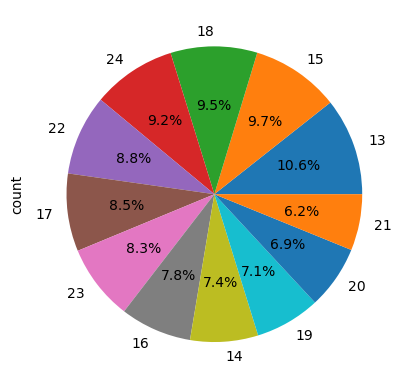

In [29]:
df[(df['tenure'] > 12) & (df['tenure'] <= 24)]['tenure'].value_counts().plot(kind='pie', autopct='%1.1f%%');

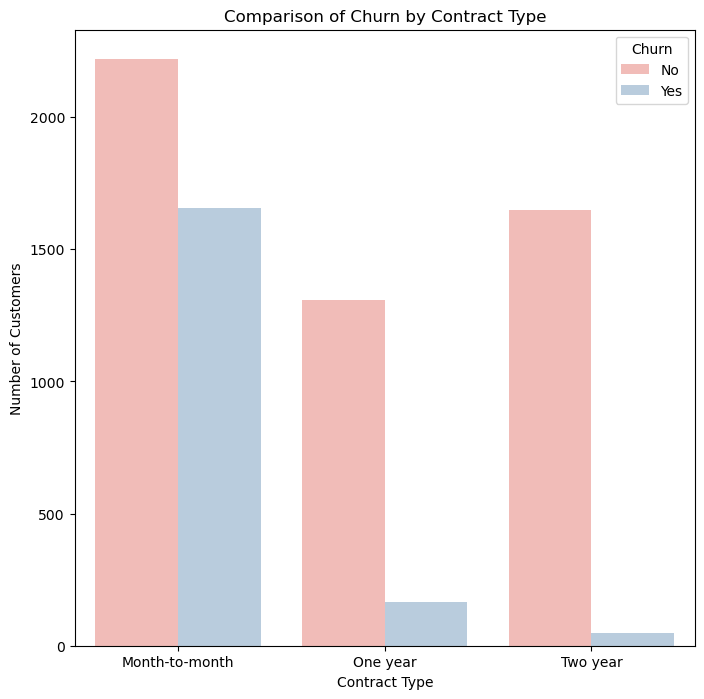

In [30]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Pastel1')
plt.title('Comparison of Churn by Contract Type')
plt.ylabel('Number of Customers')
plt.xlabel('Contract Type')
plt.show();

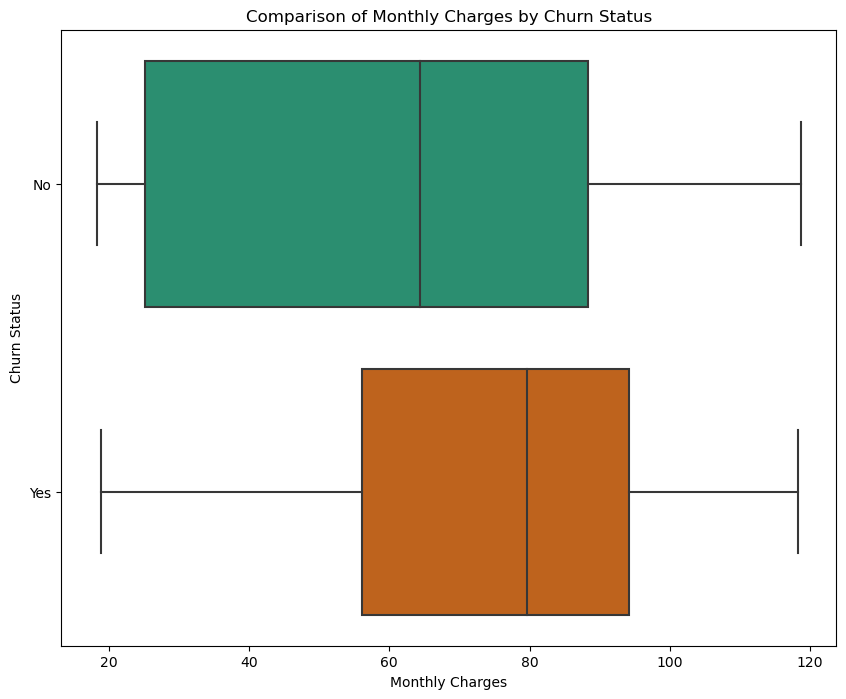

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(x='MonthlyCharges', y='Churn', data=df, palette='Dark2')
plt.title('Comparison of Monthly Charges by Churn Status')
plt.ylabel('Churn Status')
plt.xlabel('Monthly Charges')
plt.show();

In [32]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

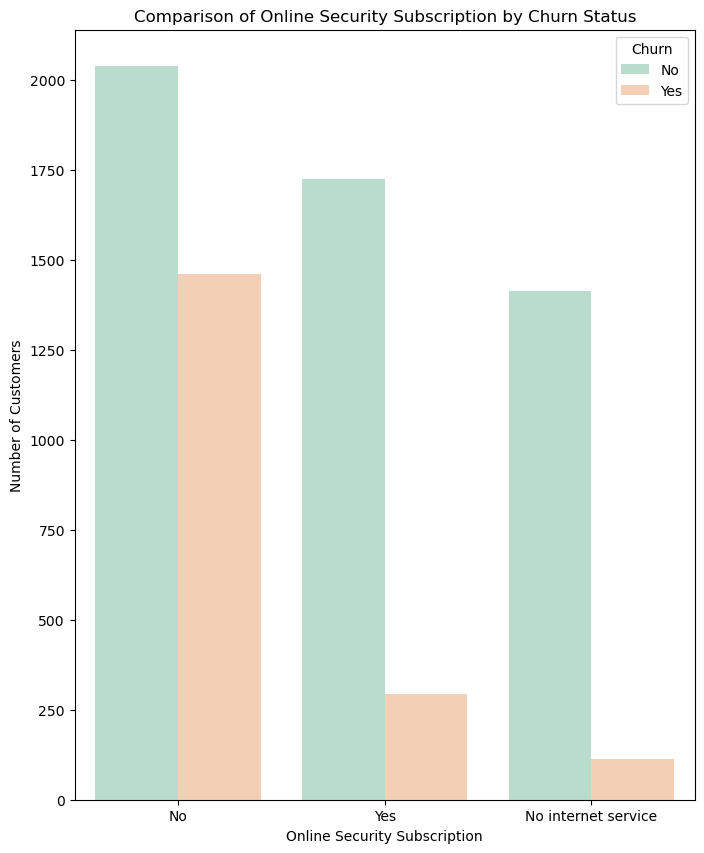

In [33]:
plt.figure(figsize=(8,10))   
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette='Pastel2')
plt.title('Comparison of Online Security Subscription by Churn Status')
plt.ylabel('Number of Customers')
plt.xlabel('Online Security Subscription')
plt.show()

In [34]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

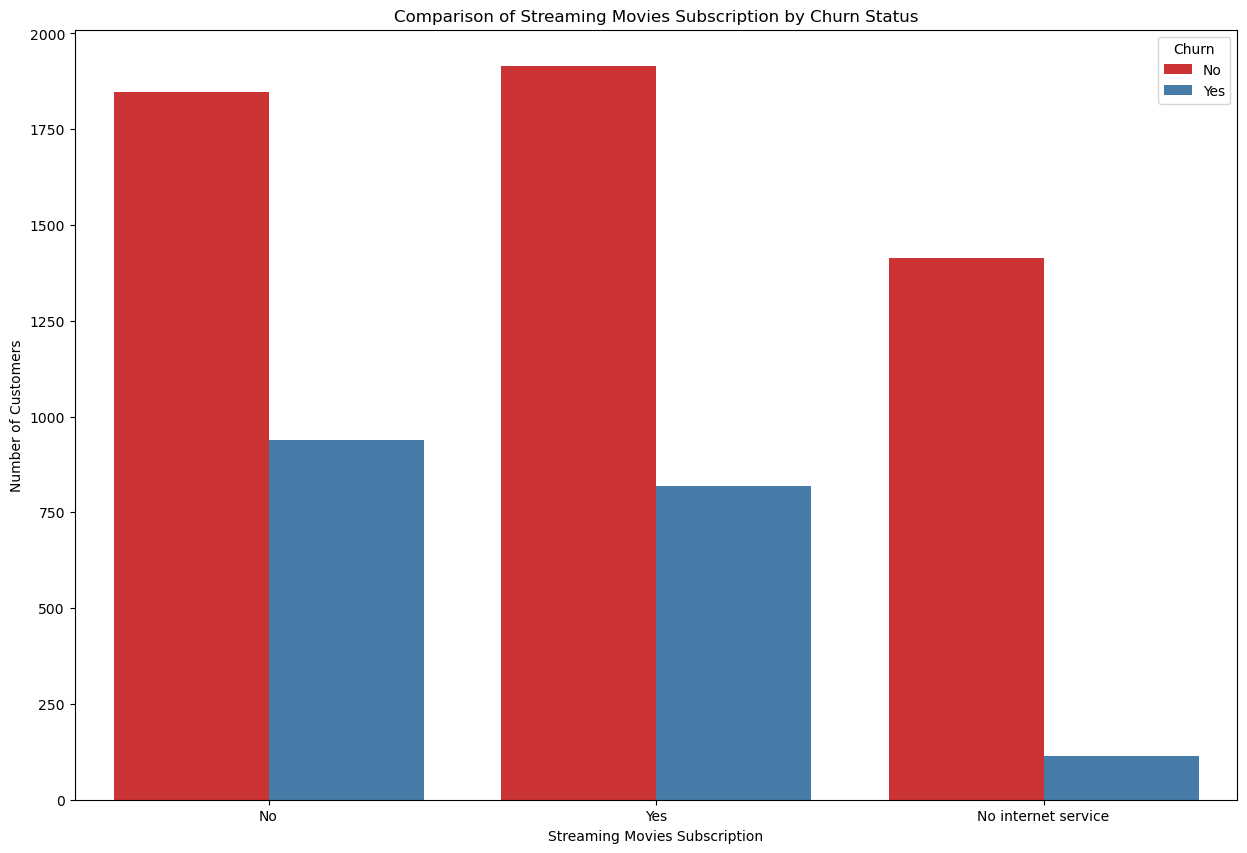

In [35]:
plt.figure(figsize=(15, 10))  
sns.countplot(x='StreamingMovies', hue='Churn', data=df, palette='Set1')
plt.title('Comparison of Streaming Movies Subscription by Churn Status')
plt.ylabel('Number of Customers')
plt.xlabel('Streaming Movies Subscription')
plt.show()

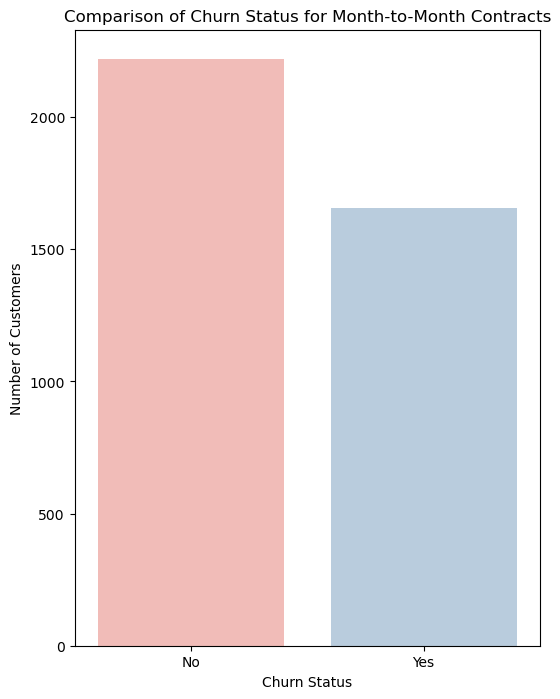

In [36]:
filtered_df = df[df['Contract'] == 'Month-to-month']
plt.figure(figsize=(6, 8)) 
sns.countplot(x='Churn', data=filtered_df, palette='Pastel1')
plt.title('Comparison of Churn Status for Month-to-Month Contracts')
plt.ylabel('Number of Customers')
plt.xlabel('Churn Status')
plt.show()

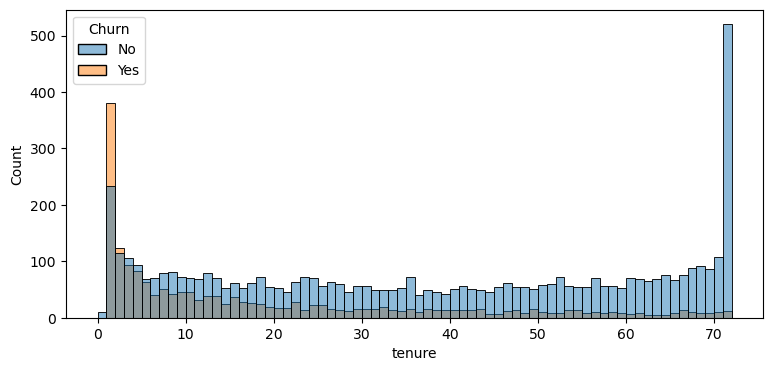

In [37]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Your plotting code
plt.figure(figsize=(9, 4))
sns.histplot(x="tenure", data=df, bins=72, hue="Churn")
plt.show()

In [38]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [39]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

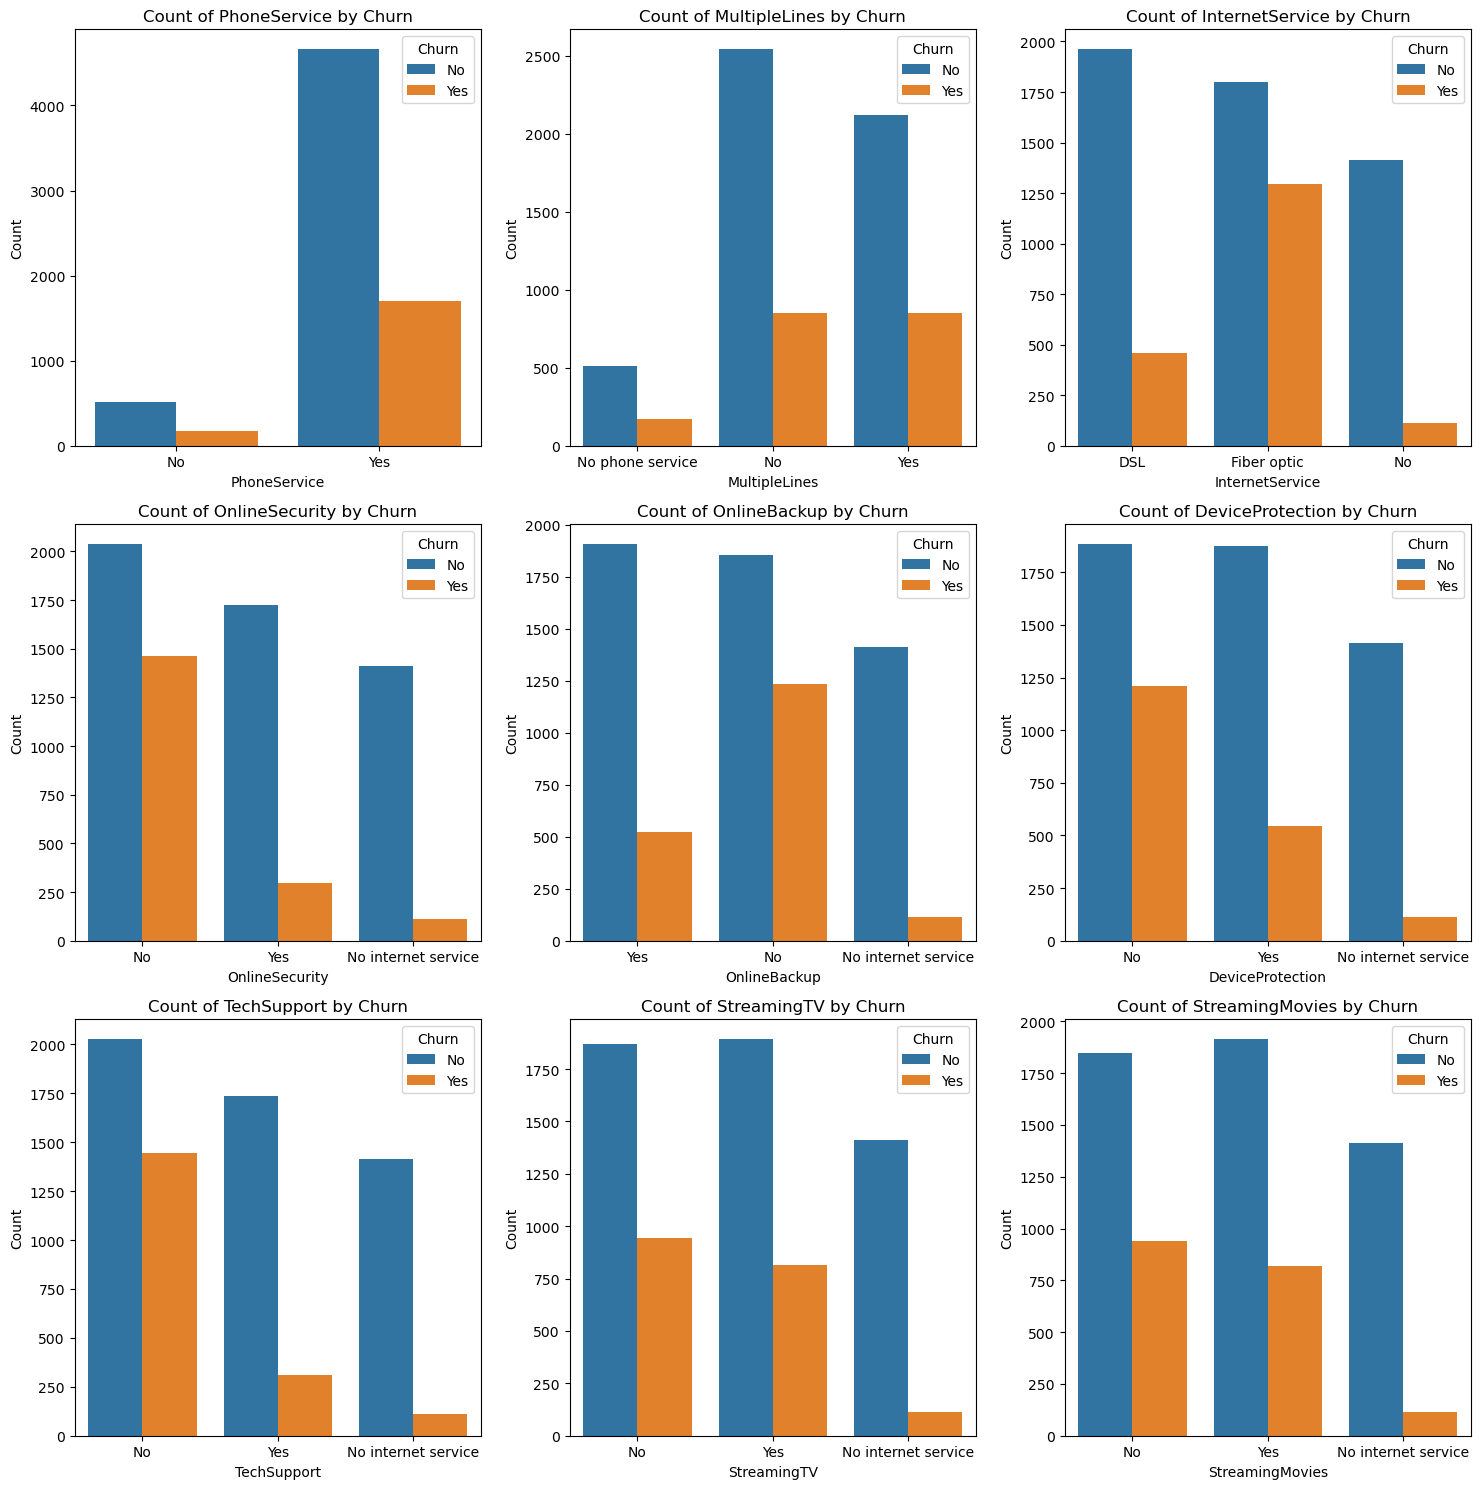

In [40]:
features = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set the number of subplots
n = len(features)
cols = 3  # Number of columns for subplots
rows = (n + cols - 1) // cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the array for easy indexing

for i, feature in enumerate(features):
    sns.countplot(x=feature, data=df, ax=axes[i], hue='Churn')  # Adjust hue if needed
    axes[i].set_title(f'Count of {feature} by Churn')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

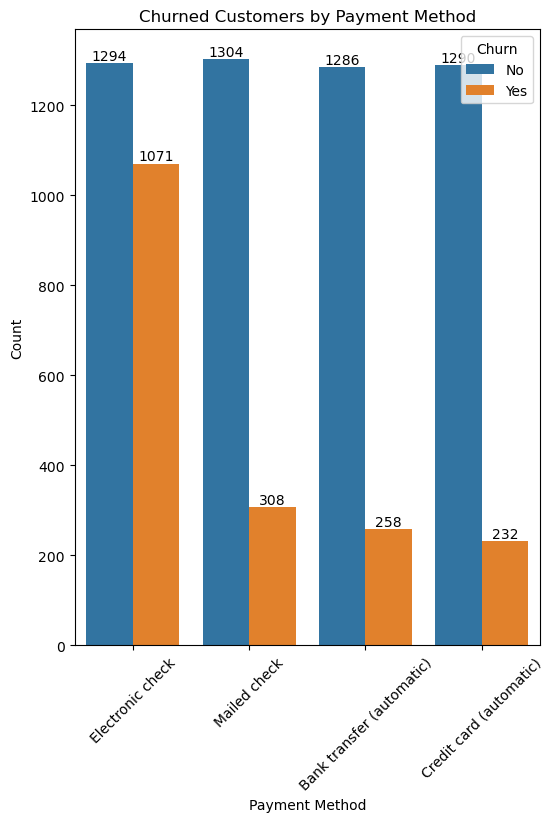

In [41]:
plt.figure(figsize=(6, 8))
ax = sns.countplot(x="PaymentMethod", data=df, hue="Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Churned Customers by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

In [42]:
df.replace('No internet service', 'No', inplace=True)

In [43]:
df.drop('gender',axis=1,inplace=True)

In [44]:
df.drop('customerID',axis=1,inplace=True)

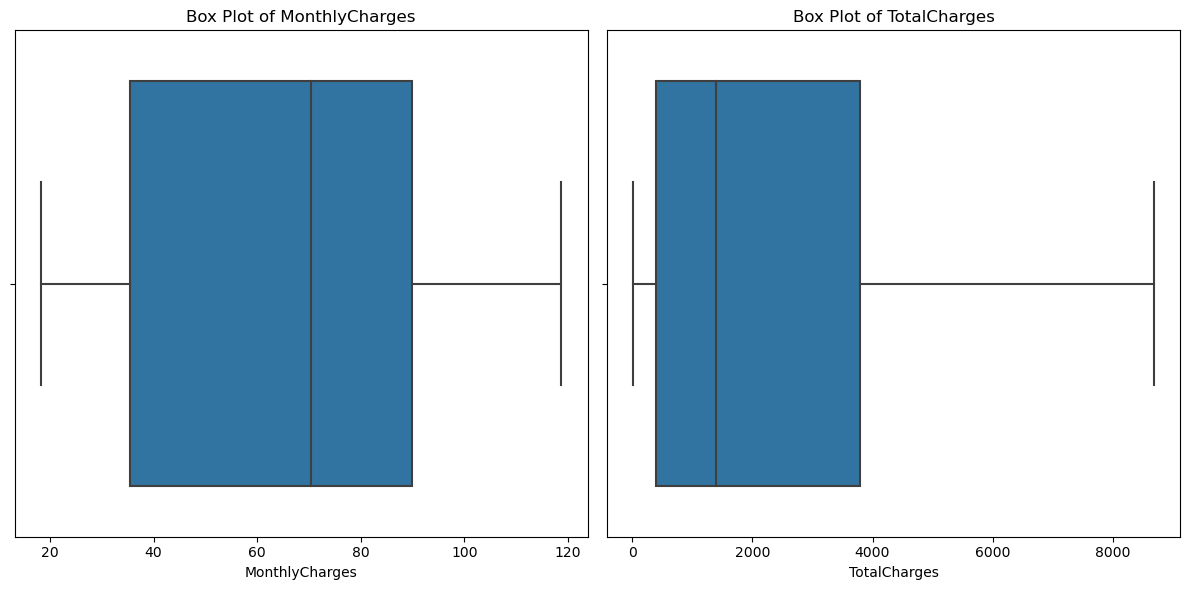

In [45]:
numerical_features = ['MonthlyCharges', 'TotalCharges',]  

plt.figure(figsize=(12, 6))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
def process_column(column):
    column = column.replace(["No internet service", "No phone service"], "No")
    column = column.replace("Yes", "1")
    column = column.replace("No", "0")
    return pd.to_numeric(column, errors='coerce')

columns = ["Partner", "Dependents", "PhoneService", "OnlineSecurity", "OnlineBackup", 
           "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", 
           "PaperlessBilling", "Churn"]

for column in columns:
    df[column] = process_column(df[column])

categorical_columns = ["MultipleLines", "Contract", "PaymentMethod", "InternetService"]
for column in categorical_columns:
    df[column] = labelencoder.fit_transform(df[column])

df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   int32  
 6   InternetService   7043 non-null   int32  
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  Contract          7043 non-null   int32  
 14  PaperlessBilling  7043 non-null   int64  
 15  PaymentMethod     7043 non-null   int32  
 16  MonthlyCharges    7043 non-null   float64


In [47]:
labelencoder = LabelEncoder()
columns = ["MultipleLines", "Contract", "PaymentMethod", "InternetService"]

for column in columns:
    df[column] = labelencoder.fit_transform(df[column])
    
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,2,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,0,1,1,72,1,2,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7040,0,1,1,11,0,1,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# Build Models


In [49]:
X = df.drop(columns=["Churn"])
Y = df["Churn"].values
print("X shape:", X.shape) 
print("Y shape:", Y.shape)

X shape: (7043, 18)
Y shape: (7043,)


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, Y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    conf_matrix = confusion_matrix(Y_test, y_pred)
    class_report = classification_report(Y_test, y_pred)

    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Classification Report:\n{class_report}')

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

## LogisticRegression


In [53]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train ,Y_train)

LogisticRegression(max_iter=1000, random_state=42)


Logistic Regression Results:
Logistic Regression Accuracy: 0.82
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



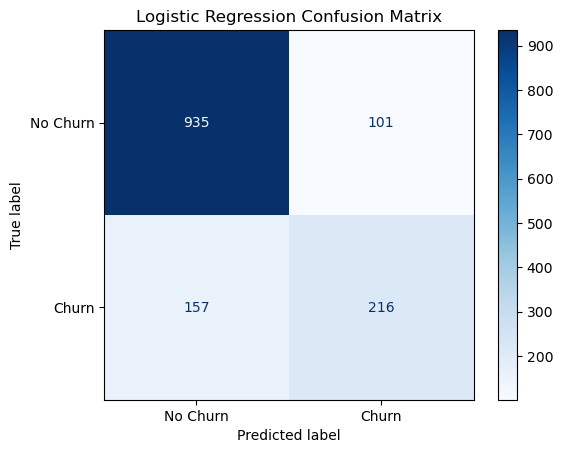

In [54]:
print("\nLogistic Regression Results:")
evaluate_model(log_reg, X_test, Y_test, "Logistic Regression")

## RandomForest

In [56]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)


Random Forest Results:
Random Forest Accuracy: 0.79
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



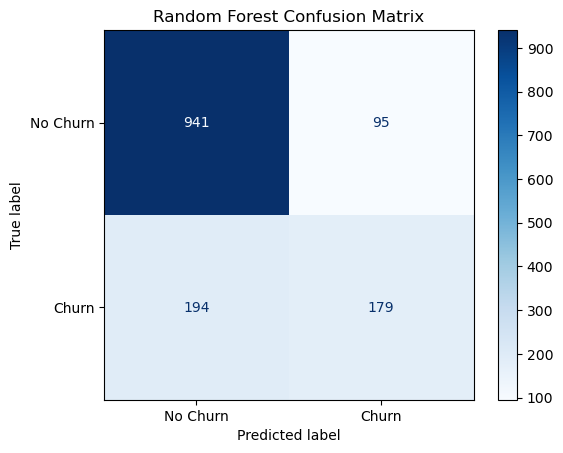

In [57]:
RandomForestClassifier
RandomForestClassifier(random_state=42)
print("\nRandom Forest Results:")
evaluate_model(rf, X_test, Y_test, "Random Forest")

# Model Optimizatio

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Sample data generation (replace this with your actual dataset)
from sklearn.datasets import make_classification

# Create synthetic dataset for demonstration
X, Y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)


# Perform cross-validation
cv_scores = cross_val_score(log_reg, X_train, Y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}')




# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': np.logspace(-4, 4, 10),  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Optimization algorithms
    'max_iter': [100, 200, 300]  # Maximum iterations
}

# Set up the GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, Y_train)

# Get the best model
best_model = grid_search.best_estimator_

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")


Cross-Validation Accuracy: 0.80 ± 0.02
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 0.046415888336127774, 'max_iter': 100, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.80


In [63]:

import mlflow
import mlflow.sklearn

# Initialize mlflow experiment
mlflow.set_experiment("customer_churn_experiment")

# Start mlflow run
with mlflow.start_run(run_name="Logistic Regression Model") as run:
    
    # Log parameters (example: Logistic Regression)
    mlflow.log_param("model_type", "Logistic Regression")
    
    # Train the model (example: Logistic Regression)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    
    # Log the model
    mlflow.sklearn.log_model(model, "logistic_regression_model")
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate and log metrics
    accuracy = accuracy_score(Y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)
    
    print(f"Logged accuracy: {accuracy}")


2024/09/25 15:55:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged accuracy: 0.8090844570617459
